In [1]:
import scutquant
import pandas as pd

df = pd.read_excel('D:/Desktop/py_csv/平安银行.xlsx')
df.set_index(['time_tick'], inplace=True)

In [2]:
df = scutquant.clean(df)
df['price_1'] = df['price'].shift(1).fillna(method='bfill')
df['ret'] = df['price'] / df['price_1'] - 1
df = df.drop(['bid_price', 'bid_volume', 'ask_price', 'ask_volume', 'open_interest'], axis=1)

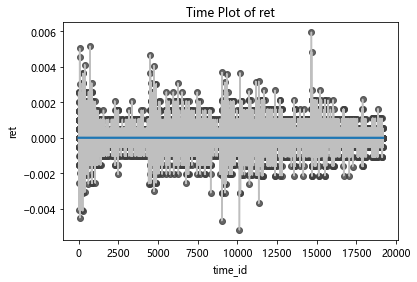

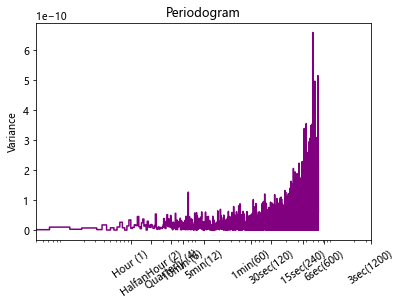

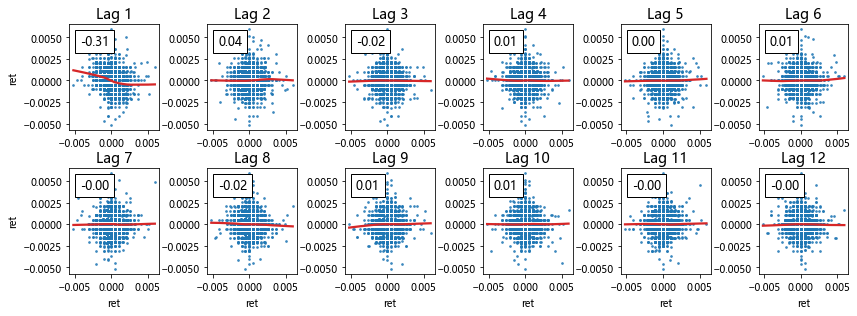

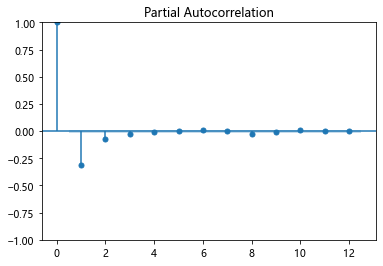

In [3]:
scutquant.Auto_ts_ana(df, label='ret', freq='3sec', windows=20, lags=12)

In [4]:
x = df.copy()
y = x.pop('ret')
x = scutquant.make_trend(x, order=1)
x = scutquant.make_fourier_features(x, freq=240, order=4)
x = scutquant.make_lags(x, data=y, lags=1)
x = scutquant.clean(x)
print(x.head(5))

                     volume  volume_tick      price   amount_tick    price_1  \
time_tick                                                                      
2021-08-23 09:30:06   19245         4030  19.469999  73147.398281  19.480000   
2021-08-23 09:30:09   20106          861  19.520000  73147.398281  19.469999   
2021-08-23 09:30:12   21071          965  19.540001  73147.398281  19.520000   
2021-08-23 09:30:15   22668         1597  19.590000  73147.398281  19.540001   
2021-08-23 09:30:18   23588          920  19.620001  73147.398281  19.590000   

                     trend  sin_240_1  cos_240_1  sin_240_2  cos_240_2  \
time_tick                                                                
2021-08-23 09:30:06    2.0   0.026177   0.999657   0.052336   0.998630   
2021-08-23 09:30:09    3.0   0.052336   0.998630   0.104528   0.994522   
2021-08-23 09:30:12    4.0   0.078459   0.996917   0.156434   0.987688   
2021-08-23 09:30:15    5.0   0.104528   0.994522   0.207912   0.97814